## Implementation

# Data Understanding



Import Libraries
 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as  px
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


Reading data 

In [2]:
data = pd.read_csv("Data.csv",nrows=101)
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.0,5.0,Green,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.0,9.0,Blue,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.0,7.0,Green,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.5,9.0,Blue,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,NaN,NaN,Green,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Gold,10,4,7
97,98,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.0,7.0,Green,10,4,7
98,99,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.0,7.0,Gold,10,17,5
99,101,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.0,4.0,Gold,10,17,7


In [3]:
data.dtypes

Id                     int64
Name                  object
Gender                object
Field                 object
Occupation            object
Age                    int64
Openness             float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Interface_1          float64
Interface_2          float64
Interface_3          float64
Interface_4          float64
Interface_5          float64
Interface_6          float64
Interface_7          float64
Interface_8          float64
Interface_9          float64
Interface_10         float64
Interface_11         float64
Interface_12         float64
Interface_13         float64
Interface_14         float64
Interface_15         float64
Interface_16         float64
Interface_17         float64
Extra_interface_1    float64
Extra_interface_2    float64
Test_Score            object
Top_1                  int64
Top_2                  int64
Top_3                  int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 101 non-null    int64  
 1   Name               101 non-null    object 
 2   Gender             101 non-null    object 
 3   Field              101 non-null    object 
 4   Occupation         101 non-null    object 
 5   Age                101 non-null    int64  
 6   Openness           101 non-null    float64
 7   Extraversion       101 non-null    float64
 8   Agreeableness      101 non-null    float64
 9   Conscientiousness  101 non-null    float64
 10  Neuroticism        101 non-null    float64
 11  Interface_1        101 non-null    float64
 12  Interface_2        101 non-null    float64
 13  Interface_3        101 non-null    float64
 14  Interface_4        101 non-null    float64
 15  Interface_5        101 non-null    float64
 16  Interface_6        101 non

In [5]:
# data['Interface_9'] = data['Interface_9'].astype('float64')


In [6]:

# data['Neuroticism'] = data['Neuroticism'].astype('float64')

In [7]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.000000
Name                 0.000000
Gender               0.000000
Field                0.000000
Occupation           0.000000
Age                  0.000000
Openness             0.000000
Extraversion         0.000000
Agreeableness        0.000000
Conscientiousness    0.000000
Neuroticism          0.000000
Interface_1          0.000000
Interface_2          0.000000
Interface_3          0.000000
Interface_4          0.000000
Interface_5          0.000000
Interface_6          0.000000
Interface_7          0.000000
Interface_8          0.000000
Interface_9          0.000000
Interface_10         0.000000
Interface_11         0.000000
Interface_12         0.000000
Interface_13         0.000000
Interface_14         0.000000
Interface_15         0.000000
Interface_16         0.000000
Interface_17         0.000000
Extra_interface_1    6.930693
Extra_interface_2    6.930693
Test_Score           0.000000
Top_1                0.000000
Top_2                0.000000
Top_3     

In [8]:
data['Extra_interface_1'].fillna(value=data['Extra_interface_1'].mean(), inplace=True)

In [9]:
data['Extra_interface_2'].fillna(value=data['Extra_interface_2'].mean(), inplace=True)


In [10]:
missing_values = data.isna().sum()/len(data)*100
missing_values


Id                   0.0
Name                 0.0
Gender               0.0
Field                0.0
Occupation           0.0
Age                  0.0
Openness             0.0
Extraversion         0.0
Agreeableness        0.0
Conscientiousness    0.0
Neuroticism          0.0
Interface_1          0.0
Interface_2          0.0
Interface_3          0.0
Interface_4          0.0
Interface_5          0.0
Interface_6          0.0
Interface_7          0.0
Interface_8          0.0
Interface_9          0.0
Interface_10         0.0
Interface_11         0.0
Interface_12         0.0
Interface_13         0.0
Interface_14         0.0
Interface_15         0.0
Interface_16         0.0
Interface_17         0.0
Extra_interface_1    0.0
Extra_interface_2    0.0
Test_Score           0.0
Top_1                0.0
Top_2                0.0
Top_3                0.0
dtype: float64

In [11]:
data['Test_Score'] .unique()

array(['Green', 'Blue', 'Gold', 'Orange', 'Orange '], dtype=object)

In [12]:
data['Test_Score'] = pd.factorize(data['Test_Score'])[0]
data['Test_Score'] .unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
data

,Id,Name,Gender,Field,Occupation,Age,Openness,Extraversion,Agreeableness,Conscientiousness,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
0,1,Nouran khaled,Female,CS,Senior Student,21,3.0,2.0,4.0,5.0,...,7.0,7.0,7.0,6.0,7.000000,5.000000,0,10,7,13
1,2,Tasneem Mohamed,Female,CS,Senior Student,21,4.0,5.0,3.0,2.0,...,8.0,8.0,7.0,8.0,6.000000,9.000000,1,6,7,13
2,3,Omaima Ahmed,Female,CS,Senior Student,23,5.0,4.0,3.0,3.0,...,5.0,7.0,7.0,9.0,6.000000,7.000000,0,1,5,7
3,4,Maryam Walid,Female,CS,Student,20,4.0,3.0,5.0,5.0,...,7.0,7.0,8.0,7.5,6.500000,9.000000,1,19,16,13
4,5,Yehia Sameh,Male,CS,Student,19,4.0,2.0,3.0,5.0,...,6.0,7.0,6.0,8.0,6.102128,6.161702,0,7,9,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.000000,7.000000,2,10,4,7
97,98,Yehia Abdallah,Male,Automatic Engineering,Senior Student,21,5.0,4.0,4.0,1.0,...,2.0,1.0,7.0,6.0,8.000000,7.000000,0,10,4,7
98,99,Khaled Khatteb,Male,Business,Software developer,23,3.0,3.0,4.0,2.0,...,7.0,6.0,8.0,9.0,6.000000,7.000000,2,10,17,5
99,101,Mohamed Elbaz,Male,CS,Senior Student,21,3.0,1.0,3.0,1.0,...,5.0,6.0,5.0,8.0,4.000000,4.000000,2,10,17,7


In [14]:
data.describe()


,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,...,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000
mean,51.019802,22.188119,4.019802,3.287129,3.524752,2.648515,3.351485,6.871287,6.061386,6.043564,...,6.514851,6.490099,7.118812,7.978218,6.102128,6.161702,1.623762,9.564356,10.80198,10.435644
std,29.334274,5.942580,0.851237,1.253688,0.881409,1.439695,1.231959,1.686199,1.920571,1.970960,...,2.269863,2.303237,1.725034,1.760375,2.030467,2.054220,1.075653,4.517557,5.28965,5.378505
min,1.000000,15.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.800000,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000
25%,26.000000,20.000000,3.000000,2.000000,3.000000,1.000000,3.000000,6.000000,5.000000,5.000000,...,5.000000,5.000000,6.000000,7.000000,5.000000,5.000000,1.000000,7.000000,7.00000,7.000000
50%,51.000000,21.000000,4.000000,3.000000,4.000000,3.000000,3.000000,7.000000,6.000000,6.000000,...,7.000000,7.000000,7.000000,8.000000,6.102128,6.161702,2.000000,10.000000,11.00000,10.000000
75%,76.000000,21.000000,5.000000,4.000000,4.000000,4.000000,4.000000,8.000000,7.000000,7.000000,...,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,2.000000,13.000000,16.00000,16.000000
max,102.000000,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,19.000000,19.00000,19.000000


# Statistical analysis

In [15]:
corr = data.corr().round(2)
corr.style.background_gradient(cmap='Pastel1')

,Id,Age,Openness,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Interface_1,Interface_2,Interface_3,Interface_4,Interface_5,Interface_6,Interface_7,Interface_8,Interface_9,Interface_10,Interface_11,Interface_12,Interface_13,Interface_14,Interface_15,Interface_16,Interface_17,Extra_interface_1,Extra_interface_2,Test_Score,Top_1,Top_2,Top_3
Id,1.000000,-0.070000,0.020000,-0.110000,0.050000,-0.170000,0.060000,-0.040000,-0.110000,-0.080000,0.030000,-0.180000,-0.070000,-0.020000,0.060000,-0.010000,0.180000,-0.060000,-0.020000,0.040000,-0.200000,-0.200000,-0.070000,0.080000,-0.010000,0.030000,0.050000,0.080000,0.030000,-0.150000
Age,-0.070000,1.000000,-0.000000,0.200000,0.200000,0.210000,0.020000,0.090000,0.070000,0.040000,0.170000,0.070000,0.130000,-0.020000,0.050000,0.060000,-0.090000,-0.010000,0.030000,0.040000,0.170000,0.180000,0.070000,-0.060000,0.180000,0.050000,-0.060000,0.010000,0.060000,0.040000
Openness,0.020000,-0.000000,1.000000,0.290000,0.050000,0.190000,0.040000,0.040000,0.030000,0.150000,0.140000,0.240000,0.110000,0.100000,0.090000,-0.020000,0.190000,0.040000,0.100000,0.220000,0.010000,-0.060000,0.140000,0.080000,0.100000,-0.020000,-0.050000,0.150000,-0.210000,-0.100000
Extraversion,-0.110000,0.200000,0.290000,1.000000,0.150000,0.120000,-0.050000,0.010000,0.180000,0.110000,0.230000,0.100000,0.150000,0.050000,0.070000,0.080000,-0.010000,0.090000,0.060000,0.020000,0.070000,0.010000,0.180000,-0.070000,0.170000,-0.070000,0.080000,-0.030000,-0.060000,0.000000
Agreeableness,0.050000,0.200000,0.050000,0.150000,1.000000,0.060000,0.140000,0.060000,0.070000,0.080000,0.050000,0.070000,-0.050000,-0.130000,-0.060000,0.070000,-0.210000,0.000000,0.050000,-0.080000,-0.030000,-0.010000,0.060000,-0.080000,0.060000,-0.020000,-0.080000,-0.040000,-0.140000,-0.070000
Conscientiousness,-0.170000,0.210000,0.190000,0.120000,0.060000,1.000000,0.040000,0.160000,0.180000,0.070000,0.010000,0.090000,0.160000,0.040000,0.070000,0.190000,-0.010000,0.180000,0.020000,0.160000,0.190000,0.110000,0.120000,0.140000,0.000000,0.020000,-0.030000,0.000000,-0.010000,0.080000
Neuroticism,0.060000,0.020000,0.040000,-0.050000,0.140000,0.040000,1.000000,0.250000,0.130000,0.260000,0.180000,0.170000,0.050000,0.040000,0.000000,0.070000,0.250000,0.120000,0.200000,0.120000,-0.060000,-0.040000,0.010000,-0.010000,0.090000,0.080000,0.040000,-0.250000,-0.220000,-0.010000
Interface_1,-0.040000,0.090000,0.040000,0.010000,0.060000,0.160000,0.250000,1.000000,0.680000,0.750000,0.390000,0.490000,0.210000,0.130000,0.110000,0.150000,0.210000,0.530000,0.400000,0.230000,0.160000,0.280000,0.250000,0.400000,0.260000,0.230000,-0.010000,-0.350000,-0.310000,-0.280000
Interface_2,-0.110000,0.070000,0.030000,0.180000,0.070000,0.180000,0.130000,0.680000,1.000000,0.730000,0.390000,0.430000,0.310000,0.300000,0.270000,0.310000,0.210000,0.350000,0.320000,0.210000,0.240000,0.320000,0.240000,0.310000,0.340000,0.170000,0.030000,-0.410000,-0.350000,-0.190000
Interface_3,-0.080000,0.040000,0.150000,0.110000,0.080000,0.070000,0.260000,0.750000,0.730000,1.000000,0.270000,0.350000,0.310000,0.230000,0.140000,0.150000,0.260000,0.420000,0.360000,0.190000,0.140000,0.250000,0.230000,0.340000,0.290000,0.160000,0.060000,-0.300000,-0.270000,-0.290000


In [16]:
data.value_counts('Test_Score')


Test_Score
2    31
1    26
3    24
0    19
4     1
dtype: int64

In [17]:
data.value_counts('Age')


Age
21    51
20    12
19    10
22     8
23     5
18     3
24     3
15     1
25     1
26     1
27     1
37     1
38     1
46     1
52     1
57     1
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

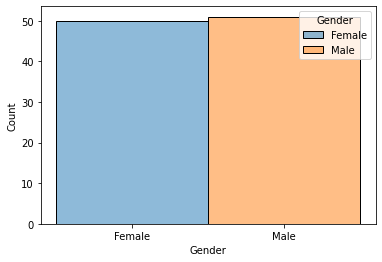

In [18]:
sns.histplot(x='Gender', hue='Gender', data=data)


<AxesSubplot:xlabel='Test_Score', ylabel='Count'>

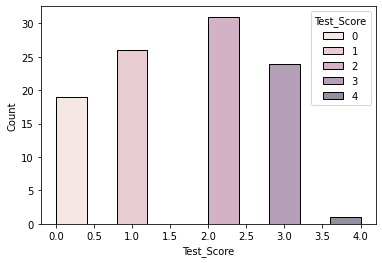

In [19]:
sns.histplot(x='Test_Score', hue='Test_Score', data=data)


<AxesSubplot:xlabel='Age', ylabel='Count'>

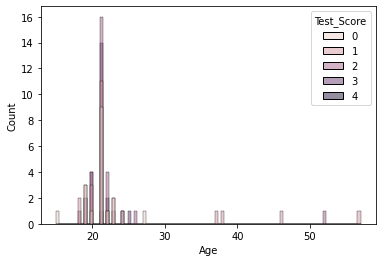

In [20]:

sns.histplot(x='Age', hue='Test_Score', data=data)


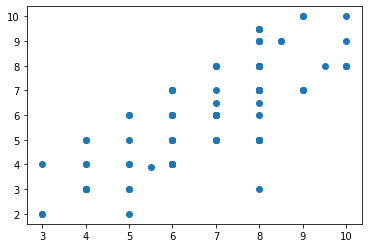

In [21]:


plt.scatter(data.Interface_1, data.Interface_3)
plt.show()

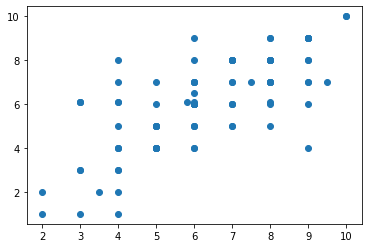

In [22]:

plt.scatter(data.Interface_4, data.Extra_interface_1)
plt.show()

Green

In [23]:
data[data["Test_Score"] == 0].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_25900\1378091649.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 0].mean()


Id                   50.894737
Age                  21.052632
Openness              4.000000
Extraversion          2.605263
Agreeableness         3.421053
Conscientiousness     3.026316
Neuroticism           3.105263
Interface_1           6.868421
Interface_2           6.168421
Interface_3           5.757895
Interface_4           6.094737
Interface_5           6.736842
Interface_6           5.784211
Interface_7           7.105263
Interface_8           5.310526
Interface_9           5.421053
Interface_10          8.868421
Interface_11          6.605263
Interface_12          5.405263
Interface_13          7.463158
Interface_14          5.736842
Interface_15          5.789474
Interface_16          6.500000
Interface_17          7.594737
Extra_interface_1     5.747480
Extra_interface_2     6.466405
Test_Score            0.000000
Top_1                 7.947368
Top_2                 9.578947
Top_3                 9.894737
dtype: float64

Blue

In [24]:
data[data["Test_Score"] == 1].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_25900\3555718546.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 1].mean()


Id                   46.615385
Age                  24.230769
Openness              4.096154
Extraversion          3.692308
Agreeableness         3.769231
Conscientiousness     2.423077
Neuroticism           3.384615
Interface_1           7.019231
Interface_2           5.865385
Interface_3           6.134615
Interface_4           6.269231
Interface_5           7.057692
Interface_6           5.653846
Interface_7           7.096154
Interface_8           4.288462
Interface_9           4.038462
Interface_10          8.115385
Interface_11          7.076923
Interface_12          6.250000
Interface_13          7.615385
Interface_14          6.500000
Interface_15          6.634615
Interface_16          7.384615
Interface_17          7.961538
Extra_interface_1     6.180933
Extra_interface_2     5.897054
Test_Score            1.000000
Top_1                10.269231
Top_2                11.038462
Top_3                10.730769
dtype: float64

Gold

In [25]:
data[data["Test_Score"] == 2].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_25900\3326052888.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 2].mean()


Id                   54.516129
Age                  22.096774
Openness              4.080645
Extraversion          3.516129
Agreeableness         3.564516
Conscientiousness     2.467742
Neuroticism           3.548387
Interface_1           6.725806
Interface_2           6.064516
Interface_3           6.112903
Interface_4           6.725806
Interface_5           6.532258
Interface_6           5.354839
Interface_7           7.161290
Interface_8           4.564516
Interface_9           4.596774
Interface_10          8.661290
Interface_11          6.654839
Interface_12          6.096774
Interface_13          7.603226
Interface_14          6.854839
Interface_15          6.774194
Interface_16          7.516129
Interface_17          8.000000
Extra_interface_1     6.684008
Extra_interface_2     6.268497
Test_Score            2.000000
Top_1                 9.903226
Top_2                11.806452
Top_3                10.774194
dtype: float64

Orange

In [26]:
data[data["Test_Score"] == 3].mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_25900\2886798128.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data["Test_Score"] == 3].mean()


Id                   49.916667
Age                  21.041667
Openness              3.875000
Extraversion          3.062500
Agreeableness         3.270833
Conscientiousness     2.854167
Neuroticism           3.270833
Interface_1           6.854167
Interface_2           6.104167
Interface_3           5.958333
Interface_4           5.875000
Interface_5           6.708333
Interface_6           5.708333
Interface_7           6.854167
Interface_8           5.104167
Interface_9           4.854167
Interface_10          8.270833
Interface_11          7.312500
Interface_12          5.416667
Interface_13          6.979167
Interface_14          6.729167
Interface_15          6.500000
Interface_16          6.854167
Interface_17          8.270833
Extra_interface_1     5.591844
Extra_interface_2     5.992642
Test_Score            3.000000
Top_1                 9.916667
Top_2                10.250000
Top_3                10.500000
dtype: float64

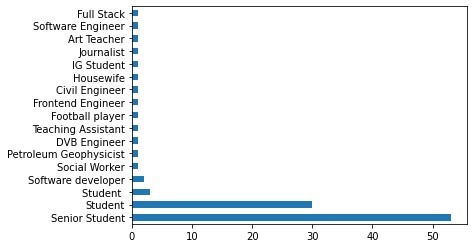

In [27]:
data.Occupation.value_counts().plot.barh()
plt.show()

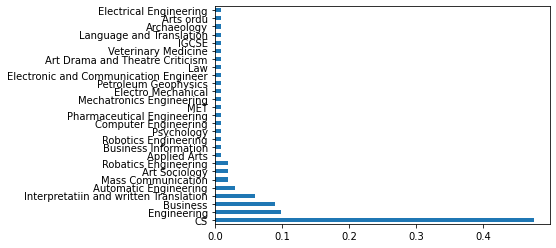

In [28]:
data.Field.value_counts(normalize= True).plot.barh()
plt.show()

Plot for all interfaces to see ratings vs  counts

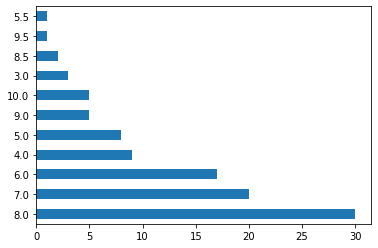

In [29]:
data.Interface_1.value_counts().plot.barh()
plt.show()

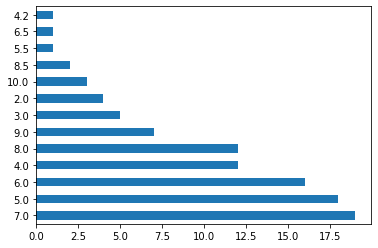

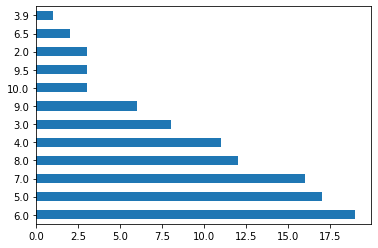

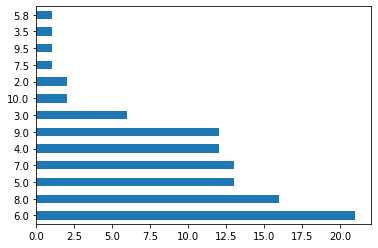

In [30]:
data.Interface_2.value_counts().plot.barh()
plt.show()
data.Interface_3.value_counts().plot.barh()
plt.show()
data.Interface_4.value_counts().plot.barh()
plt.show()

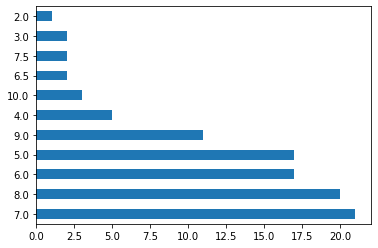

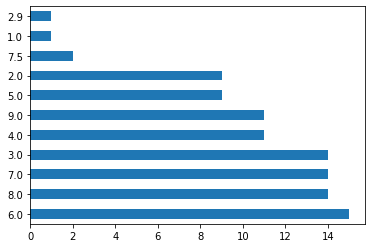

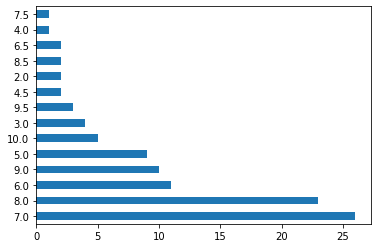

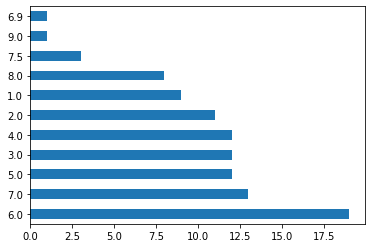

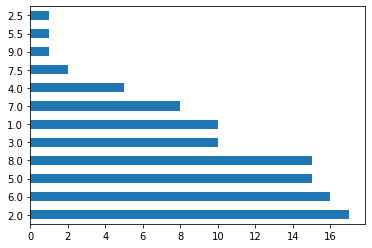

In [31]:
data.Interface_5.value_counts().plot.barh()
plt.show()
data.Interface_6.value_counts().plot.barh()
plt.show()
data.Interface_7.value_counts().plot.barh()
plt.show()
data.Interface_8.value_counts().plot.barh()
plt.show()
data.Interface_9.value_counts().plot.barh()
plt.show()


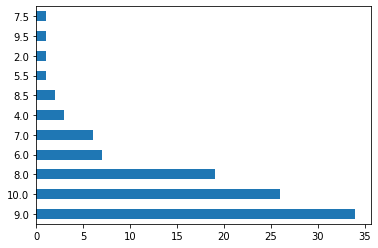

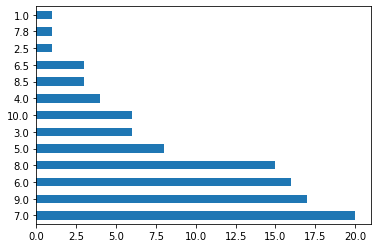

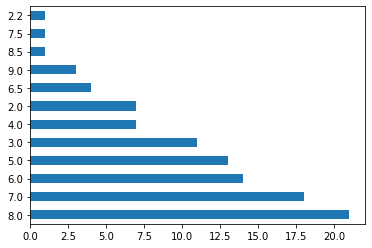

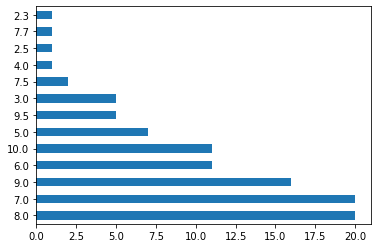

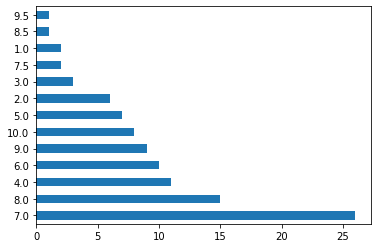

In [32]:
data.Interface_10.value_counts().plot.barh()
plt.show()
data.Interface_11.value_counts().plot.barh()
plt.show()
data.Interface_12.value_counts().plot.barh()
plt.show()
data.Interface_13.value_counts().plot.barh()
plt.show()
data.Interface_14.value_counts().plot.barh()
plt.show()


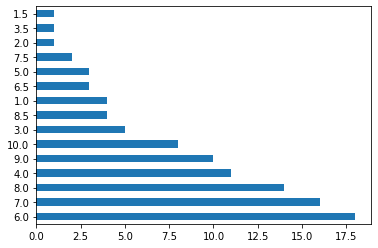

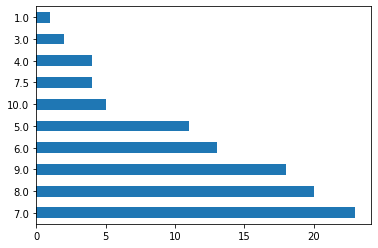

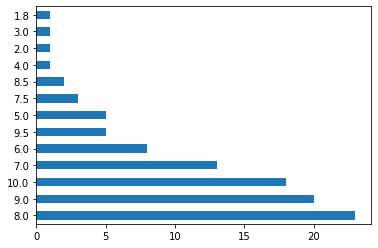

In [33]:
data.Interface_15.value_counts().plot.barh()
plt.show()
data.Interface_16.value_counts().plot.barh()
plt.show()
data.Interface_17.value_counts().plot.barh()
plt.show()



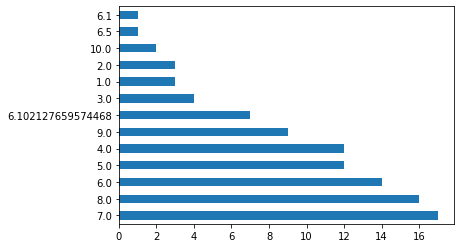

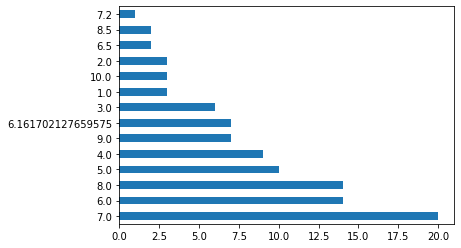

In [34]:
data.Extra_interface_1.value_counts().plot.barh()
plt.show()
data.Extra_interface_2.value_counts().plot.barh()
plt.show()

Top 3 ratings columns

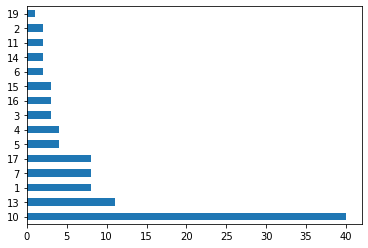

In [35]:
data.Top_1.value_counts().plot.barh()
plt.show()


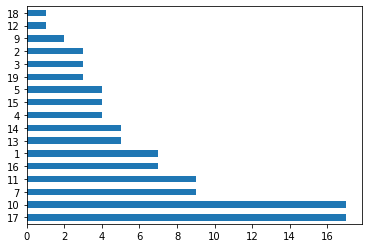

In [36]:
data.Top_2.value_counts().plot.barh()
plt.show()

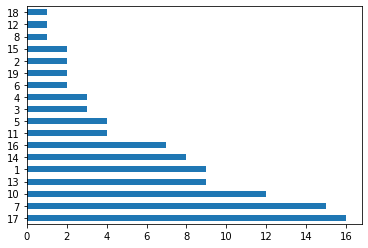

In [37]:
data.Top_3.value_counts().plot.barh()
plt.show()

<AxesSubplot:xlabel='Interface_1', ylabel='Interface_3'>

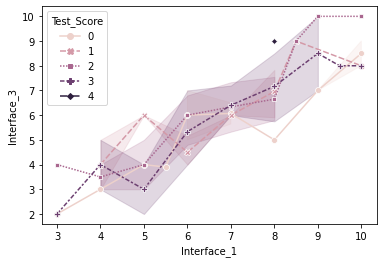

In [38]:
sns.lineplot(x = "Interface_1",y = "Interface_3",data = data,hue = "Test_Score",style = "Test_Score",markers=True)

In [39]:
new = data.groupby("Top_1")["Test_Score"].count()
new

Top_1
1      8
2      2
3      3
4      4
5      4
6      2
7      8
10    40
11     2
13    11
14     2
15     3
16     3
17     8
19     1
Name: Test_Score, dtype: int64

In [40]:
new = data.groupby("Test_Score")["Top_2"].count()
new

Test_Score
0    19
1    26
2    31
3    24
4     1
Name: Top_2, dtype: int64

In [41]:
data['Extraversion']

0      2.0
1      5.0
2      4.0
3      3.0
4      2.0
      ... 
96     4.0
97     4.0
98     3.0
99     1.0
100    1.0
Name: Extraversion, Length: 101, dtype: float64

In [42]:
introversion = data.loc[data.Extraversion < 3, 'Extraversion']
introversion.count()


29

In [43]:
Extraversion_persons = data.loc[data.Extraversion > 3, 'Extraversion'] 
Extraversion_persons.count()


48